(sec-data-science-lifecycle)=
# Data Science Lifecycle

Data science involves exploring and experimenting with data. A data science project consists of multiple steps, such as data preparation, modeling, and deploying to production environments. As shown in {numref}`fig-data-science-lifecycle`, CRISP-DM (Cross-industry standard process for data mining) was initially proposed as an industry-standard by Shearer {cite}`shearer2000CRISPDM` to describe the data science lifecycle.

```{figure} ../img/ch-data-science/data-science-lifecycle.svg
---
width: 400px
name: fig-data-science-lifecycle
---
Data Science Lifecycle
```

CRISP-DM consists of six parts:

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

## Business Understanding

Understanding the business logic plays a vital role in the success of any project because the ultimate goal of data science is to serve the business. Before diving into specific data science modeling, data analysts should deeply understand the business. For example, in e-commerce data analysis, one must first comprehend the intrinsic logic of e-commerce, user demands, and company business goals to better serve users and the company in subsequent modeling and analysis.

House price prediction is a typical data science scenario. We have chosen the California housing dataset for demonstration purposes. This dataset provides features such as house prices, neighborhood income, house age, number of rooms, number of bedrooms, and neighborhood population. In this business scenario, we need to clarify the objective: as house prices are influenced by multiple factors, real estate agents should negotiate between buyers and sellers to reach a reasonable price for the house.

## Data Understanding

After understanding the business logic, the next step is to understand the data. Data analysts need to collaborate closely with the business team to understand the available data and any third-party data relevant to the business. Specifically, data analysts need to delve into how the data is generated, its description, data types, and many other details. At this stage, exploratory data analysis (EDA) may also be conducted by examining the data distribution or visualizing the data to gain insights into its basic characteristics.

Here, we explore the housing price dataset. It is worth noting that enterprise data is often more complex than open-source data and tightly integrated with the business.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

cal = fetch_california_housing(data_home="../data/", as_frame=True)
cal_df = pd.DataFrame(cal.data,
                             columns=cal.feature_names)
cal_df['MedHouseValue'] = pd.Series(cal.target)
cal_df.head(3)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521

There are a total of 8 columns in the data, and we are interested in predicting the `MedHouseValue`, which represents the house price. To gain a macro-level understanding of the entire dataset, we can utilize various visualization methods.

In [2]:
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

sns.scatterplot(data=cal_df, x="MedInc",y='MedHouseValue',
    hue='MedHouseValue', palette='cool', legend=False)

<Axes: xlabel='MedInc', ylabel='MedHouseValue'>

From the chart, it can be observed that there is a certain correlation between house prices (the y-axis `MedHouseValue`) and income (the x-axis `MedInc`).

## Data Preparation

After understanding the basics, the next step is data preparation. This step is also known as data cleaning or data wrangling. It involves selecting data, integrating data from multiple sources, cleaning the data, removing unnecessary columns and features, handling missing values and outliers, creating new data through feature engineering, and formatting the data into the desired structure for the next machine learning steps. For machine learning tasks, the data also needs to be split into training and testing sets. This step heavily relies on exploratory data analysis to identify patterns and outliers in the data. Insights gained from data exploration can help in selecting the appropriate algorithmic models.

Open-source data available on the internet is often already preprocessed, but data preparation for real-world business scenarios is much more challenging than working with open-source data. Therefore, data preparation is the most time-consuming step, accounting for 70%-90% of the overall project time. However, it is also the most crucial step in the entire data science lifecycle.

In the context of house price prediction, the current open-source dataset we are using only has 8 columns of features. To improve the performance of this task, it would be beneficial to explore additional information, such as detailed house area. If data can be obtained from other sources and integrated, it can significantly enhance the final outcome. However, data integration requires data cleaning and alignment.

The preprocessing of data heavily relies on data analysts' experience, which is beyond the scope of detailed discussion here. For now, we will simply split the data into training and testing sets.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cal.data,
                                                    cal.target, random_state=11)

## Modeling

Modeling is considered the heart of data analysis. It takes the prepared data as input and outputs the predicted values. Modeling involves refining the business problem itself, determining whether the current data science problem is a classification problem, regression problem, clustering problem, or other problems, and selecting an appropriate model to handle the data. Once a model is chosen, the hyperparameters of each model need to be adjusted among various algorithms to achieve the desired performance.

Now, let's use the linear regression algorithm to model house prices:

In [4]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

## Validation

Before deploying the model to the production environment, it is essential to validate its performance. There are many evaluation metrics to assess the effectiveness of a model, such as model accuracy. Here, the predicted values are compared with the actual values, and different models and hyperparameters can be tried to observe accuracy.

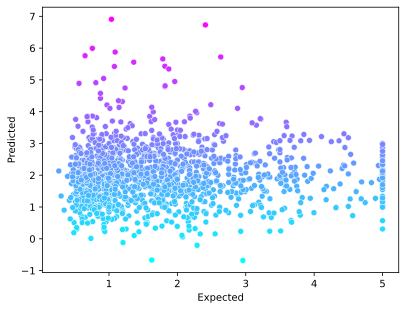

In [5]:
predicted = linear_regression.predict(X_test)
expected = y_test

df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)

## Deployment

The model needs rigorous validation before it can be deployed online. In addition to offline testing, online gray testing may also be conducted before being used by all users. Offline testing refers to validation based on historical data without pushing the model to online users. Gray testing involves trying the project with a specific group of users before rolling it out to the entire user base, gradually increasing the number of trial users from "gray" to "black" based on the results. If the gray testing results are not satisfactory, further iterations and repetitions of the above data science steps may be necessary. If data collection is not accurate, data cleaning is not reasonable, or there are issues with offline testing evaluation metrics, the model will not perform well online.

## Summary

The aforementioned steps collectively form the lifecycle of data science. From the {numref}`sec-data-science-lifecycle` and the case study, it can be observed that data science is an iterative process, and there are no clearly defined boundaries between different steps.